In [ ]:


# Import des bibliothèques de base
import numpy as np  # Calcul numérique
import pandas as pd  # Manipulation de données tabulaires

# Visualisation des données
import matplotlib.pyplot as plt  # Tracé de graphiques classiques
import seaborn as sns  # Visualisation statistique améliorée

# Configuration de l'apparence des graphiques
plt.style.use('seaborn-v0_8-whitegrid')  # Style de fond
plt.rcParams['figure.figsize'] = (12, 8)  # Taille par défaut des figures
sns.set(font_scale=1.2)  # Taille de police des graphes

#  Prétraitement des données
from sklearn.impute import SimpleImputer  # Gestion des valeurs manquantes
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Normalisation et encodage
from sklearn.compose import ColumnTransformer  # Traitement différent selon les colonnes

#  Création de pipelines
from sklearn.pipeline import Pipeline  # Pour chaîner les étapes de traitement

# Réduction de dimension
from sklearn.decomposition import PCA  # Analyse en Composantes Principales

#  Modèles de classification
from sklearn.neighbors import KNeighborsClassifier  # K plus proches voisins
from sklearn.tree import DecisionTreeClassifier  # Arbre de décision
from sklearn.linear_model import LogisticRegression  # Régression logistique

# Évaluation et validation croisée
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Séparation des données et optimisation
from sklearn.metrics import (  # Métriques d’évaluation
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Gestion des avertissements
import warnings
warnings.filterwarnings('ignore')  # Masquer les warnings pour un affichage plus propre





In [ ]:

# CHARGEMENT ET EXPLORATION INITIALE DES DONNÉES


# Chargement des données
df_abandon = pd.read_csv("Dataset_Abandon_Scolaire.csv")  # Chargement du fichier CSV

# Aperçu des premières lignes
print("Aperçu des données d'abandon scolaire :")
display(df_abandon.head())

# 1. PRÉTRAITEMENT INITIAL DES DONNÉES


# Informations générales
print("Informations sur le dataset d'abandon scolaire :")
print(f"Nombre d'observations : {df_abandon.shape[0]}")  # Nombre de lignes
print(f"Nombre de variables : {df_abandon.shape[1]}")    # Nombre de colonnes

# Types de données
print("\nTypes de données par colonne :")
display(df_abandon.dtypes)

# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques :")
display(df_abandon.describe())

# Vérification des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
display(df_abandon.isnull().sum())


Aperçu des données d'abandon scolaire :


,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


Informations sur le dataset d'abandon scolaire :
Nombre d'observations : 2000
Nombre de variables : 7

Types de données par colonne :


,0
Age,int64
Sexe,object
Taux_presence,float64
Nombre_retards,int64
Note_moyenne,float64
Situation_familiale,object
Abandon,int64



Statistiques descriptives des variables numériques :


,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000



Nombre de valeurs manquantes par colonne :


,0
Age,0
Sexe,0
Taux_presence,0
Nombre_retards,0
Note_moyenne,0
Situation_familiale,0
Abandon,0


# Le jeu de données contient 2000 observations et 7 variables, dont 2 catégorielles (Sexe, Situation_familiale) et 5 numériques.
# Les statistiques montrent une moyenne d’âge de 20,6 ans, un taux de présence moyen de 84,6%, et un taux d’abandon global de 8,4%.
# Aucune valeur manquante n’est présente, ce qui permet d’entamer directement l’analyse sans traitement d’imputation.

In [ ]:

# 2. INSPECTION ET CORRECTION DES VARIABLES CATÉGORIELLES


# Vérification des modalités uniques
print("Valeurs uniques dans la variable 'Sexe' :")
print(df_abandon['Sexe'].unique())

print("\nValeurs uniques dans la variable 'Situation_familiale' :")
print(df_abandon['Situation_familiale'].unique())




Valeurs uniques dans la variable 'Sexe' :
['Femme' 'Homme']

Valeurs uniques dans la variable 'Situation_familiale' :
['Enfants à charge' 'Célibataire' 'Marié' 'Divorcé']


#Cette inspection permet de valider la qualité des données catégorielles avant d’aller plus loin dans l’analyse ou la modélisation. Elle confirme que les valeurs sont propres, sans fautes ou valeurs aberrantes, ce qui est essentiel pour une bonne préparation des données (notamment pour l'encodage ou la visualisation).

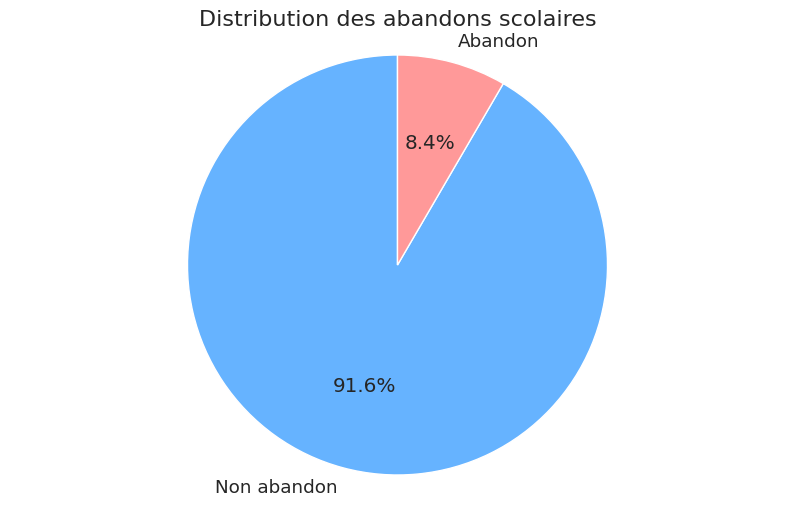

Nombre d'étudiants ayant abandonné : 168
Nombre d'étudiants n'ayant pas abandonné : 1832
Taux d'abandon : 8.40%


In [ ]:

# 3. ANALYSE DE LA VARIABLE CIBLE : 'Abandon'


# Visualisation de la répartition
plt.figure(figsize=(10, 6))

# Comptage des classes
abandon_counts = df_abandon['Abandon'].value_counts()

# Libellés des classes (0 = Non abandon, 1 = Abandon)
labels = ['Non abandon', 'Abandon']
colors = ['#66b3ff', '#ff9999']

# Création du graphique en camembert
plt.pie(abandon_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution des abandons scolaires', fontsize=16)
plt.axis('equal')  # Assure que le cercle soit bien rond
plt.show()

#  Statistiques sur la variable cible
n_abandons = df_abandon['Abandon'].sum()
n_non_abandons = (df_abandon['Abandon'] == 0).sum()
taux_abandon = df_abandon['Abandon'].mean() * 100

print(f"Nombre d'étudiants ayant abandonné : {n_abandons}")
print(f"Nombre d'étudiants n'ayant pas abandonné : {n_non_abandons}")
print(f"Taux d'abandon : {taux_abandon:.2f}%")


# La majorité des étudiants n'ont pas abandonné leurs études (91.6 %), contre seulement 8.4 % qui ont abandonné.
# Cela représente 168 abandons sur 2000 étudiants, contre 1832 non abandons.
# Le taux d’abandon scolaire dans le dataset est donc relativement faible, à 8.40 %.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#  Séparation entre variables explicatives (X) et la cible (y)
X = df_abandon.drop("Abandon", axis=1)
y = df_abandon["Abandon"]

#Définition des variables numériques et catégorielles
numeric_features = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']
categorical_features = ['Sexe', 'Situation_familiale']

# 1. Imputation des données manquantes
# Numérique : médiane
num_imputer = SimpleImputer(strategy='median')
X_numeric_imputed = num_imputer.fit_transform(X[numeric_features])

# Catégoriel : valeur la plus fréquente
cat_imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = cat_imputer.fit_transform(X[categorical_features])

# 2. Normalisation des variables numériques
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_imputed)

# 3. Encodage one-hot des variables catégorielles
# 3. Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X_categorical_imputed)


#  4. Fusion des données traitées
encoded_cat_cols = encoder.get_feature_names_out(categorical_features)
X_processed = np.hstack([X_numeric_scaled, X_categorical_encoded])
X_processed_df = pd.DataFrame(X_processed, columns=list(numeric_features) + list(encoded_cat_cols))

# 5. Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42, stratify=y
)

#  Vérification
print(f"Dimensions du X train : {X_train.shape}")
print(f"Dimensions du X test  : {X_test.shape}")


Dimensions du X train : (1600, 10)
Dimensions du X test  : (400, 10)


#Cette étape prépare les données pour garantir qu’elles soient propres, cohérentes et exploitables par les algorithmes de machine learning. On corrige les valeurs manquantes, on met toutes les variables sur une échelle comparable, on encode les catégories, et on prépare les ensembles d'entraînement et de test. Le résultat confirme que nous avons 1600 observations pour l'entraînement et 400 pour le test, sur un total de 2000 élèves, avec 10 variables par individu.




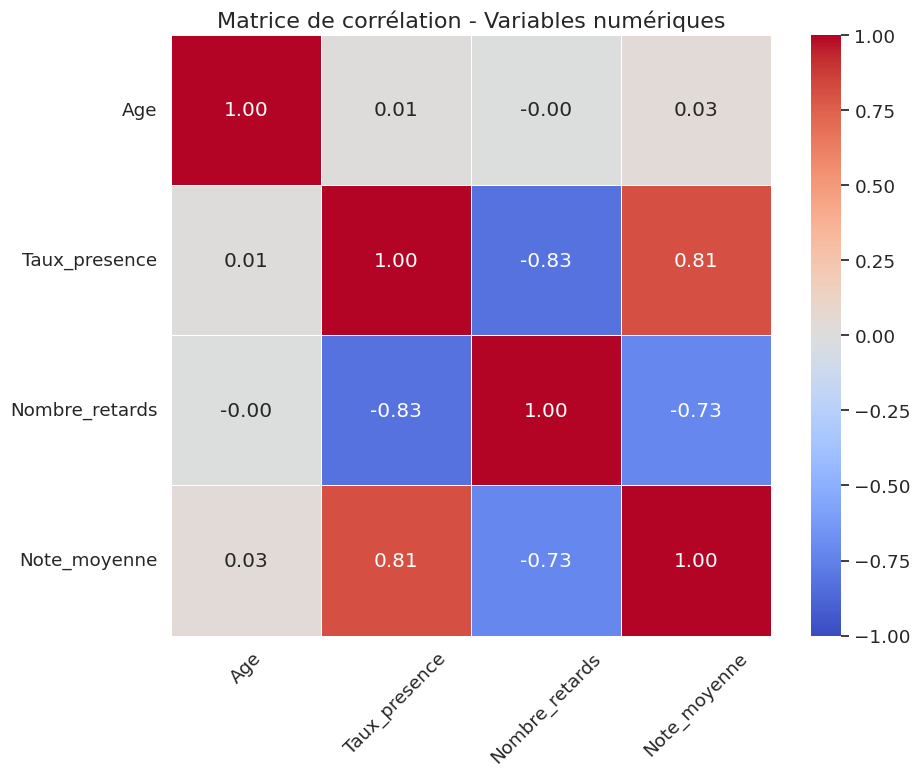

In [ ]:

# 5. ANALYSE DES CORRÉLATIONS ENTRE VARIABLES NUMÉRIQUES


#  Sélection des données numériques
numeric_data = df_abandon[numeric_features]

#  Calcul de la matrice de corrélation
correlation = numeric_data.corr()

#  Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,               # Affiche les coefficients
    cmap='coolwarm',          # Palette de couleurs
    vmin=-1, vmax=1,          # Bornes de l’échelle
    fmt='.2f',                # Format des valeurs
    linewidths=0.5,           # Lignes de séparation
    square=True               # Carrés pour chaque cellule
)
plt.title('Matrice de corrélation - Variables numériques', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Le taux de présence est fortement corrélé positivement avec la note moyenne (+0.81) :
# Plus un étudiant est présent en cours, meilleures sont ses performances académiques.

# Il est aussi fortement corrélé négativement avec le nombre de retards (-0.83) :
#Cela signifie que les étudiants présents sont rarement en retard, ce qui est logique.

#Le nombre de retards est négativement corrélé avec la note moyenne (-0.73) :
#Un élève souvent en retard a tendance à avoir de moins bons résultats scolaires.

# Enfin, la variable âge montre peu ou pas de corrélation avec les autres variables, indiquant qu’elle n’a pas d’impact significatif direct sur la présence, les retards ou les notes.

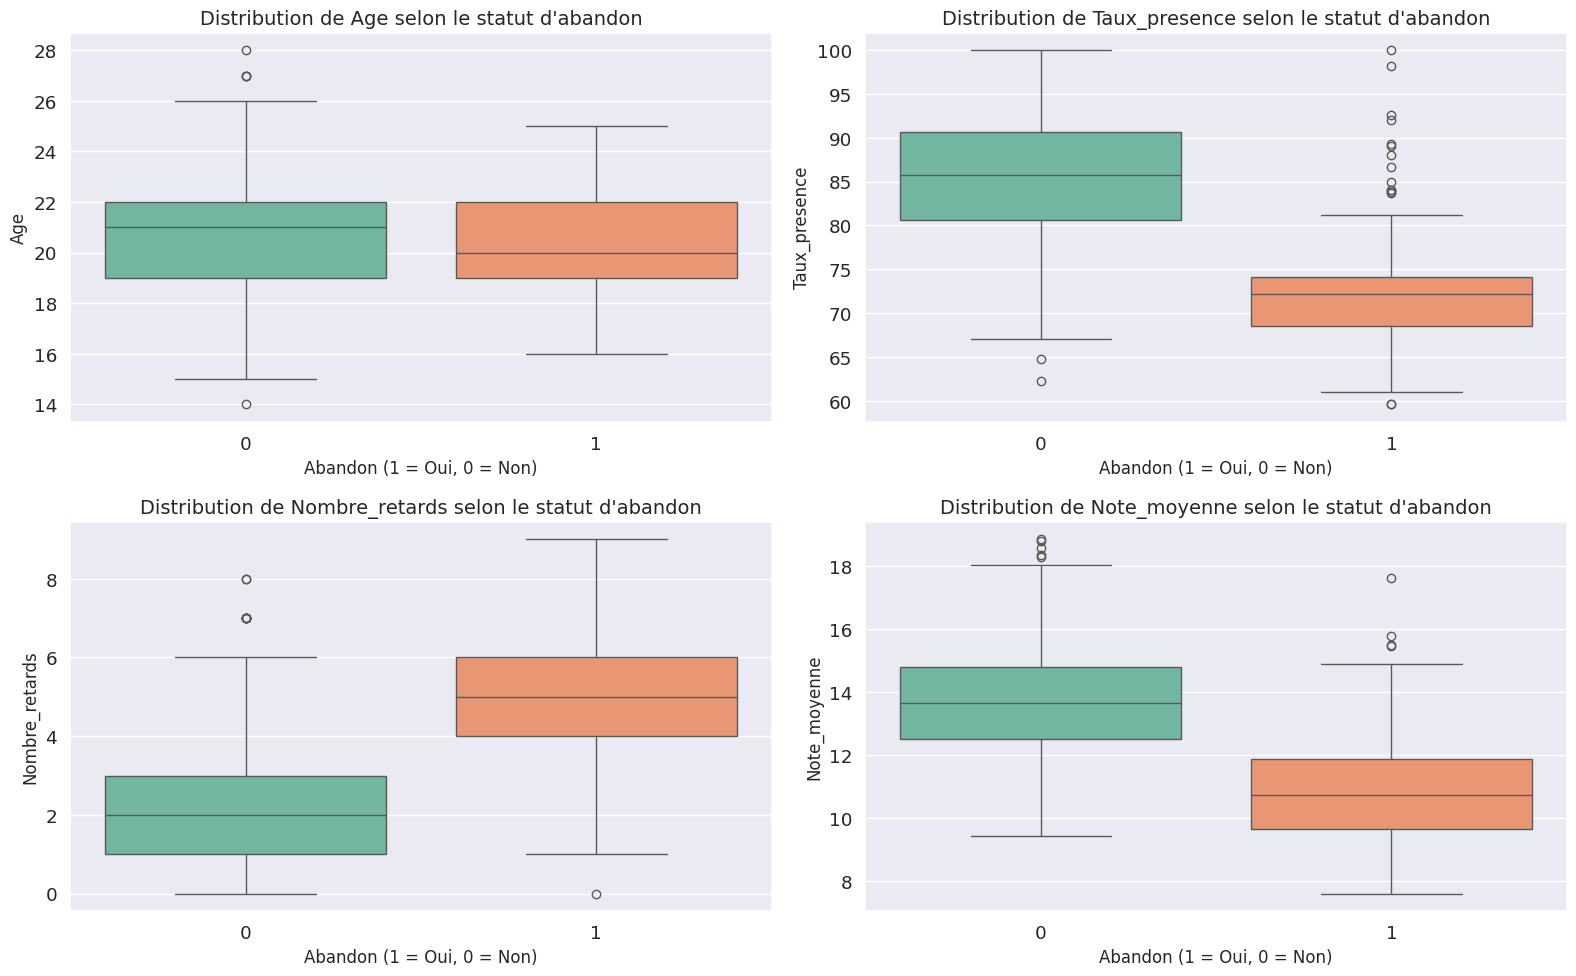

In [ ]:

# 6. DISTRIBUTION DES VARIABLES NUMÉRIQUES PAR STATUT D'ABANDON


#  Création d'une grille de boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2 lignes, 2 colonnes de graphiques
axes = axes.flatten()  # Aplatir la grille pour itération

#  Tracé des boxplots pour chaque variable numérique
for i, feature in enumerate(numeric_features):
    sns.boxplot(
        x='Abandon',
        y=feature,
        data=df_abandon,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f'Distribution de {feature} selon le statut d\'abandon', fontsize=14)
    axes[i].set_xlabel('Abandon (1 = Oui, 0 = Non)', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


#Analyse des distributions par abandon (Boxplots)
Chaque graphique compare une variable entre deux groupes :

0 = Non Abandon

1 = Abandon

 1. Âge

Les étudiants qui ont abandonné semblent un peu plus jeunes en moyenne que ceux qui n’ont pas abandonné.

Mais les différences ne sont pas très marquées, et les médianes sont proches.

 L’âge seul n’est probablement pas un facteur déterminant de l’abandon.

 2. Taux de présence

Il y a une forte différence entre les deux groupes :

Les étudiants non abandonnés ont un taux de présence élevé.

Ceux qui ont abandonné ont un taux de présence plus faible.

 Cela suggère que le manque de présence en cours est fortement lié au risque d’abandon.

 3. Nombre de retards

Les étudiants ayant abandonné ont un nombre de retards plus élevé.

La médiane est nettement plus haute pour le groupe "Abandon".

 Les retards fréquents sont un indicateur de risque d’abandon scolaire.

 4. Note moyenne

Les étudiants ayant abandonné ont une note moyenne plus faible.

Le groupe "non abandon" a des notes plus élevées avec moins de dispersion.

 Des résultats académiques faibles sont également associés à l’abandon.

# pour conclure ces graphiques montrent que les étudiants qui abandonnent présentent souvent un taux de présence plus bas, plus de retards et des notes moyennes plus faibles. Ce sont donc des indicateurs pertinents pour anticiper l’abandon scolaire. L’âge semble avoir un rôle plus secondaire.

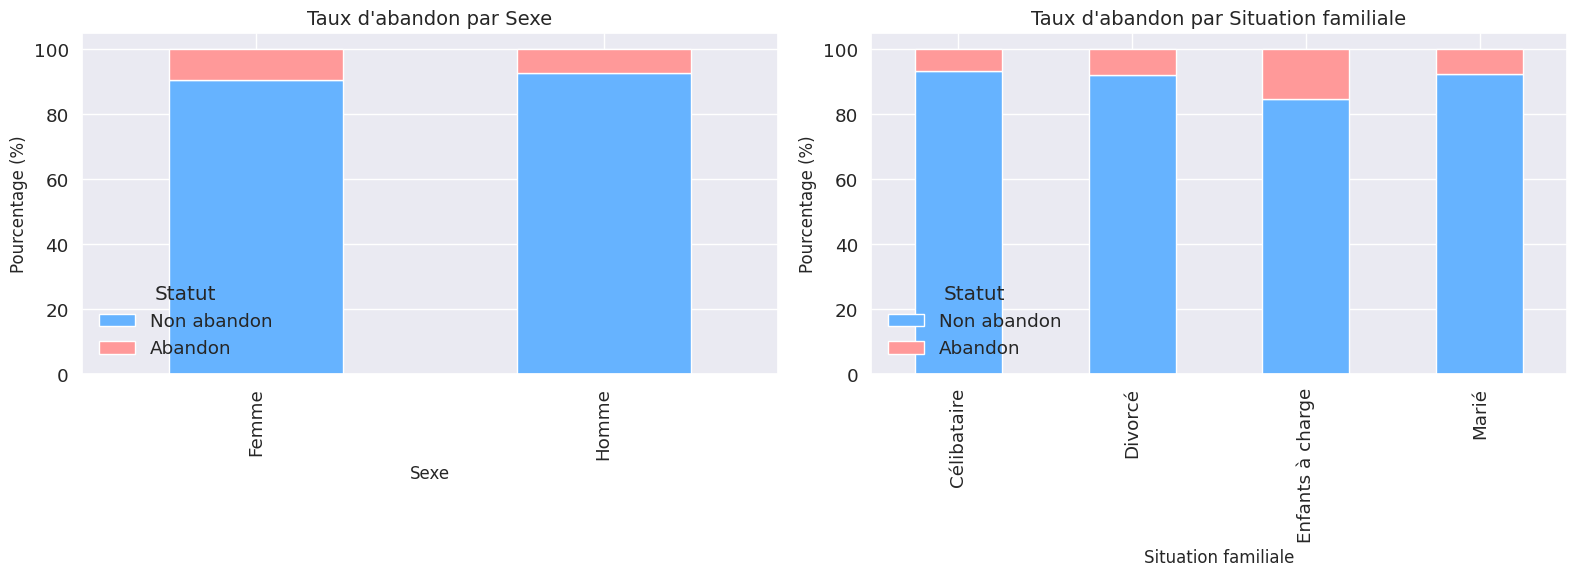

In [ ]:

# 7. ANALYSE DES VARIABLES CATÉGORIELLES PAR RAPPORT À L'ABANDON


# Création de la figure avec 2 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#  Analyse de la variable 'Sexe'
sexe_abandon = pd.crosstab(df_abandon['Sexe'], df_abandon['Abandon'], normalize='index') * 100
sexe_abandon.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=['#66b3ff', '#ff9999']
)
axes[0].set_title('Taux d\'abandon par Sexe', fontsize=14)
axes[0].set_xlabel('Sexe', fontsize=12)
axes[0].set_ylabel('Pourcentage (%)', fontsize=12)
axes[0].legend(['Non abandon', 'Abandon'], title='Statut')

# Analyse de la variable 'Situation familiale'
situation_abandon = pd.crosstab(df_abandon['Situation_familiale'], df_abandon['Abandon'], normalize='index') * 100
situation_abandon.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    color=['#66b3ff', '#ff9999']
)
axes[1].set_title('Taux d\'abandon par Situation familiale', fontsize=14)
axes[1].set_xlabel('Situation familiale', fontsize=12)
axes[1].set_ylabel('Pourcentage (%)', fontsize=12)
axes[1].legend(['Non abandon', 'Abandon'], title='Statut')

#  Mise en forme finale
plt.tight_layout()
plt.show()


#Analyse des abandons par sexe
 On observe deux barres : Femme et Homme.
Chaque barre est divisée en deux couleurs :

 Bleu = étudiants n’ayant pas abandonné

 Rouge = étudiants ayant abandonné

 Observation :

Le taux d’abandon est légèrement plus élevé chez les femmes que chez les hommes.

Mais la différence reste modérée, ce qui suggère que le sexe n’est pas un facteur fortement discriminant de l’abandon dans ce jeu de données.

 Analyse des abandons par situation familiale
 Quatre catégories : Célibataire, Divorcé, Enfants à charge, Marié

 Observations :

Les étudiants ayant des enfants à charge présentent le taux d’abandon le plus élevé (plus de rouge).

Les mariés et les célibataires ont les taux d’abandon les plus faibles.

Les divorcés sont dans une position intermédiaire.

 Cela suggère que :

 La situation familiale semble influencer le risque d’abandon. Les étudiants ayant des responsabilités familiales, comme des enfants à charge, sont plus susceptibles d’abandonner.

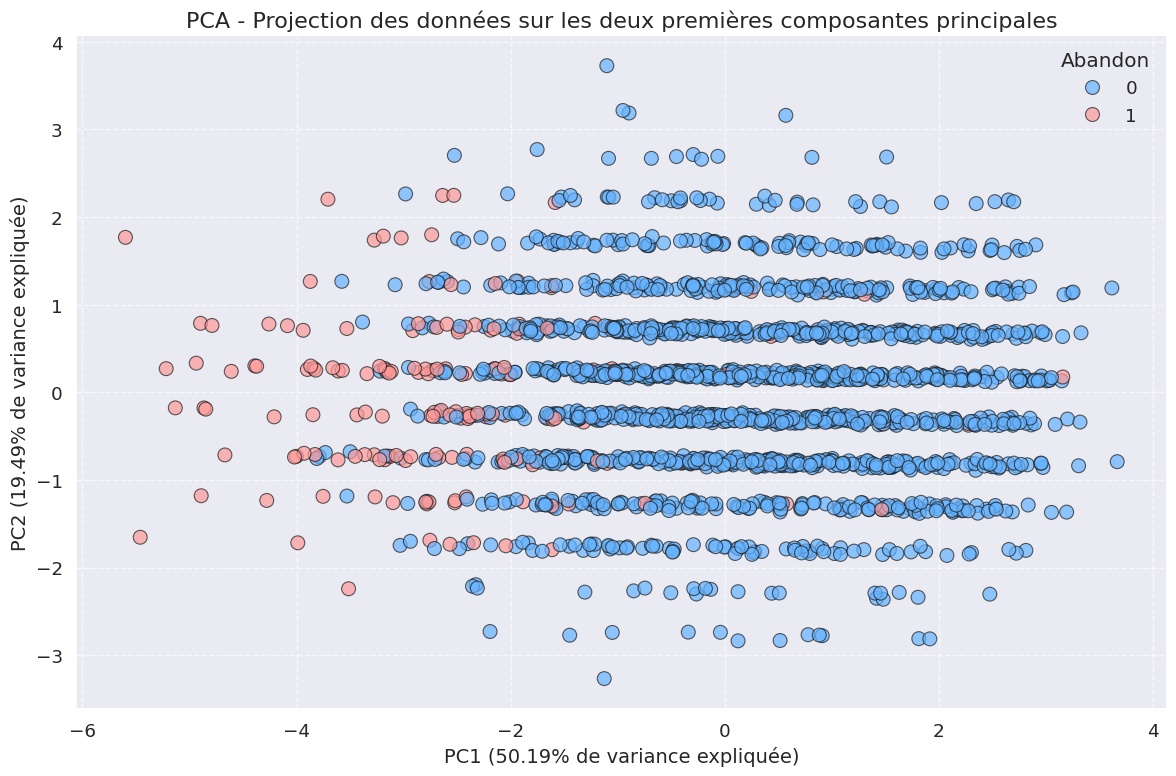

Variance expliquée par les deux premières composantes : 69.68%


In [ ]:

# 8. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)


# Prétraitement des données (via pipeline défini précédemment)
X_preprocessed = preprocessor.fit_transform(X_abandon)

#  Application de l'PCApour réduction à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Création d'un DataFrame pour la visualisation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Abandon'] = y_abandon.values

# Visualisation en nuage de points
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Abandon',
    palette=['#66b3ff', '#ff9999'],
    s=100,
    alpha=0.7,
    edgecolor='k'
)

plt.title("PCA - Projection des données sur les deux premières composantes principales", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} de variance expliquée)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} de variance expliquée)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Affichage de la variance expliquée
total_variance = pca.explained_variance_ratio_.sum()
print(f"Variance expliquée par les deux premières composantes : {total_variance:.2%}")


#Ici, on a projeté les données sur 2 composantes principales (PC1 et PC2) pour visualiser leur répartition.

 Lecture du graphique
L’axe horizontal (PC1) explique 50.19 % de la variance.

L’axe vertical (PC2) explique 19.49 % de la variance.

Ensemble, ces deux axes représentent environ 69.68 % de l'information totale du dataset.

 Les points bleus représentent les étudiants n’ayant pas abandonné (classe 0)

 Les points rouges représentent ceux ayant abandonné (classe 1)

 Analyse des résultats

 On observe une certaine séparation entre les deux groupes, mais pas parfaitement nette :

Les étudiants ayant abandonné (rouge) se trouvent davantage vers la gauche de l’axe PC1, indiquant un certain profil commun (par exemple : taux de présence plus faible ou notes moyennes plus basses).

Les étudiants non-abandonnés (bleu) sont plus répartis sur la droite du graphique.

 Cela suggère que la PCA révèle des tendances, mais ne permet pas à elle seule de parfaitement séparer les deux classes. D’autres méthodes (ex. modèles de classification) seront nécessaires.



In [ ]:

# 9. DÉFINITION ET ÉVALUATION DES MODÈLES DE CLASSIFICATION


#  Liste des modèles à évaluer
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

#  Fonction pour entraîner et évaluer un modèle
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test, preprocessor):
    """
    Entraîne un pipeline (prétraitement + modèle), puis évalue sa performance.
    Affiche les métriques de classification, une matrice de confusion,
    les scores de validation croisée et un rapport détaillé.
    """

    # Création du pipeline complet
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Entraînement sur les données d'entraînement
    full_pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = full_pipeline.predict(X_test)

    #  Métriques de performance
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    print(f"\n Résultats pour {model_name}")
    print("-" * 40)
    print(f" Accuracy  : {accuracy:.4f}")
    print(f" Precision : {precision:.4f}")
    print(f" Recall    : {recall:.4f}")
    print(f" F1-score  : {f1:.4f}")

    #  Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matrice de confusion - {model_name}", fontsize=16)
    plt.xlabel('Prédiction', fontsize=12)
    plt.ylabel('Valeur réelle', fontsize=12)
    plt.xticks([0.5, 1.5], ['Non abandon', 'Abandon'])
    plt.yticks([0.5, 1.5], ['Non abandon', 'Abandon'])
    plt.tight_layout()
    plt.show()

    #  Validation croisée
    cv_scores = cross_val_score(
        full_pipeline,
        pd.concat([X_train, X_test]),
        pd.concat([y_train, y_test]),
        cv=5,
        scoring='accuracy'
    )

    print("\n Validation croisée (5-fold)")
    print(f"Scores individuels     : {cv_scores}")
    print(f"Score moyen            : {np.mean(cv_scores):.4f}")
    print(f"Écart-type             : {np.std(cv_scores):.4f}")

    #  Rapport détaillé
    print("\n Rapport de classification")
    print(classification_report(y_test, y_pred, target_names=['Non abandon', 'Abandon']))

    return full_pipeline, accuracy, precision, recall, f1


#Ce code évalue les performances de trois modèles pour prédire l’abandon scolaire. Il utilise un pipeline combinant prétraitement et apprentissage. Pour chaque modèle, on mesure la précision, le rappel, le f1-score, et on affiche la matrice de confusion ainsi que les résultats de la validation croisée pour garantir la fiabilité.


 Évaluation du modèle : KNN

 Résultats pour KNN
----------------------------------------
 Accuracy  : 0.9340
 Precision : 0.6552
 Recall    : 0.4524
 F1-score  : 0.5352


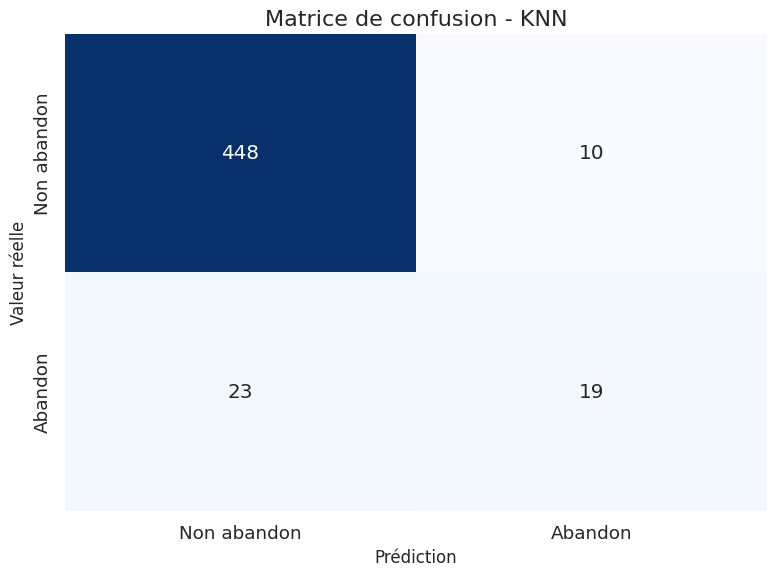


 Validation croisée (5-fold)
Scores individuels     : [0.935  0.9475 0.935  0.94   0.935 ]
Score moyen            : 0.9385
Écart-type             : 0.0049

 Rapport de classification
              precision    recall  f1-score   support

 Non abandon       0.95      0.98      0.96       458
     Abandon       0.66      0.45      0.54        42

    accuracy                           0.93       500
   macro avg       0.80      0.72      0.75       500
weighted avg       0.93      0.93      0.93       500


 Évaluation du modèle : Decision Tree

 Résultats pour Decision Tree
----------------------------------------
 Accuracy  : 0.9340
 Precision : 0.6000
 Recall    : 0.6429
 F1-score  : 0.6207


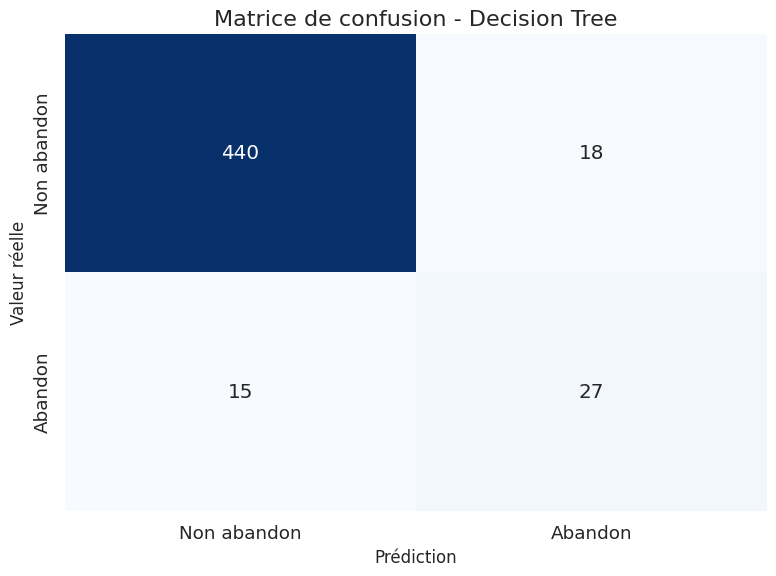


 Validation croisée (5-fold)
Scores individuels     : [0.9325 0.9025 0.9225 0.9325 0.9325]
Score moyen            : 0.9245
Écart-type             : 0.0117

 Rapport de classification
              precision    recall  f1-score   support

 Non abandon       0.97      0.96      0.96       458
     Abandon       0.60      0.64      0.62        42

    accuracy                           0.93       500
   macro avg       0.78      0.80      0.79       500
weighted avg       0.94      0.93      0.94       500


 Évaluation du modèle : Logistic Regression

 Résultats pour Logistic Regression
----------------------------------------
 Accuracy  : 0.9500
 Precision : 0.7742
 Recall    : 0.5714
 F1-score  : 0.6575


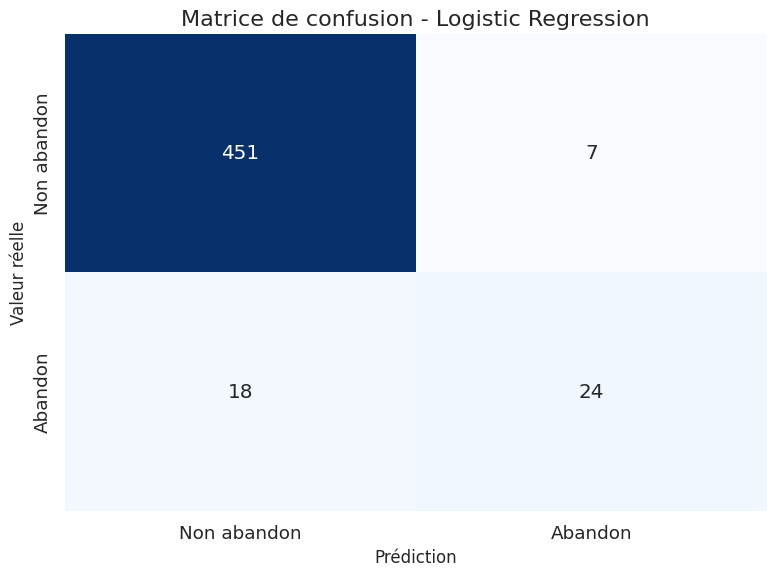


 Validation croisée (5-fold)
Scores individuels     : [0.94   0.925  0.9475 0.9375 0.945 ]
Score moyen            : 0.9390
Écart-type             : 0.0078

 Rapport de classification
              precision    recall  f1-score   support

 Non abandon       0.96      0.98      0.97       458
     Abandon       0.77      0.57      0.66        42

    accuracy                           0.95       500
   macro avg       0.87      0.78      0.82       500
weighted avg       0.95      0.95      0.95       500



In [ ]:

# 10. ÉVALUATION DES MODÈLES DE CLASSIFICATION


# Dictionnaire pour stocker les résultats de chaque modèle
results_abandon = {}

# Boucle d’évaluation pour chaque modèle défini dans le dictionnaire `models`
for model_name, model in models.items():
    print(f"\n{'=' * 50}")
    print(f" Évaluation du modèle : {model_name}")
    print(f"{'=' * 50}")

    # Entraînement, évaluation et récupération des métriques
    pipeline, accuracy, precision, recall, f1 = evaluate_model(
        model_name=model_name,
        model=model,
        X_train=X_train_abandon,
        X_test=X_test_abandon,
        y_train=y_train_abandon,
        y_test=y_test_abandon,
        preprocessor=preprocessor
    )

    # Stockage des résultats dans un dictionnaire pour comparaison ultérieure
    results_abandon[model_name] = {
        'pipeline': pipeline,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }



#Le modèle KNN:

Interprétation :
Le modèle KNN parvient à bien prédire les cas de non-abandon (448 sur 458), mais il a des difficultés à détecter les clients qui vont réellement abandonner. En effet, il n’en détecte que 19 sur 42 (rappel = 45%), ce qui signifie qu’il rate plus de la moitié des abandons. De plus, le F1-score relativement faible (0.53) confirme que ce modèle n’est pas équilibré pour la tâche de détection des abandons.

#Modèle Arbre de Décision (Decision Tree):


 Interprétation :
Ce modèle détecte plus de cas d’abandon que le précédent (27 au lieu de 19), ce qui est positif. Il offre également un meilleur équilibre entre précision et rappel (64%), ce qui signifie qu’il est capable de mieux identifier les clients à risque tout en limitant les erreurs de fausse alerte. Le F1-score de 0.62 montre que le compromis entre les deux est plus satisfaisant que pour KNN.

#Le modèle de régression logistique

Interprétation :
Le modèle de régression logistique présente les meilleurs résultats globaux. Il a la meilleure précision (77%), ce qui signifie que lorsqu’il prédit un abandon, il a souvent raison. Il détecte 24 abandons sur 42 (rappel = 57%), ce qui est mieux que KNN mais un peu moins que l’arbre de décision. Cependant, il fait peu d’erreurs sur les clients qui ne vont pas abandonner, ce qui est crucial pour ne pas agir à tort sur de "bons" clients. Son F1-score élevé (0.66) traduit un excellent compromis.

 Comparaison des performances des modèles :


,accuracy,precision,recall,f1
KNN,0.934,0.655172,0.452381,0.535211
Decision Tree,0.934,0.600000,0.642857,0.620690
Logistic Regression,0.950,0.774194,0.571429,0.657534


<Figure size 1200x800 with 0 Axes>

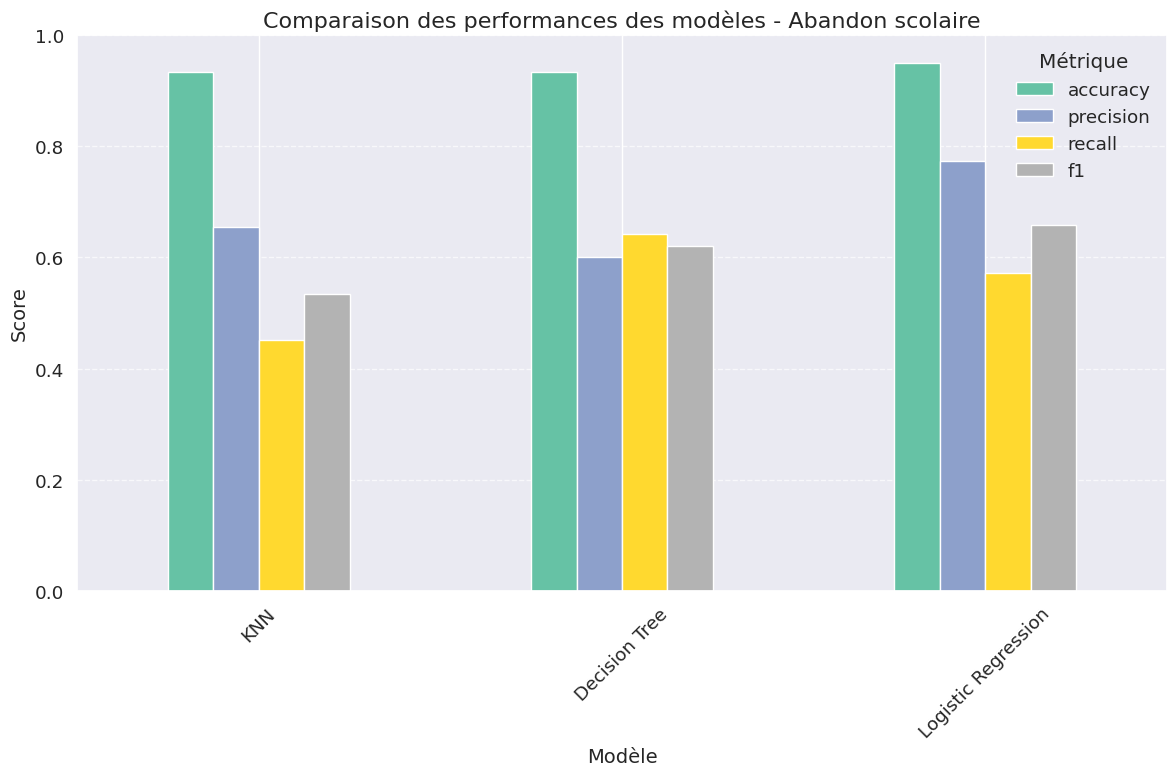

In [ ]:

# 11. COMPARAISON DES PERFORMANCES DES MODÈLES


# Liste des métriques à comparer
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Création d'un dictionnaire regroupant les scores de chaque modèle pour chaque métrique
comparison_data = {
    metric: [results_abandon[model][metric] for model in models.keys()]
    for metric in metrics
}

# Création d’un DataFrame pour faciliter l’analyse comparative
comparison_df = pd.DataFrame(comparison_data, index=models.keys())

# Affichage tabulaire des résultats
print(" Comparaison des performances des modèles :")
display(comparison_df)

# Visualisation graphique des performances
plt.figure(figsize=(12, 8))
comparison_df.plot(kind='bar', figsize=(12, 8), colormap='Set2')

# Mise en forme du graphique
plt.title('Comparaison des performances des modèles - Abandon scolaire', fontsize=16)
plt.xlabel('Modèle', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Les scores vont de 0 à 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()


#En comparant les trois modèles :

Le modèle KNN obtient une bonne accuracy mais échoue à détecter efficacement les abandons.

L’arbre de décision montre une bonne capacité de détection (rappel élevé) mais avec une précision plus modeste.

La régression logistique est le modèle le plus équilibré, avec la meilleure précision, le meilleur F1-score, et une bonne performance générale.

In [ ]:
# Définition des grilles de paramètres pour chaque modèle
param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'classifier__penalty': ['l2', 'l1', None],
        'classifier__solver': ['lbfgs', 'liblinear', 'saga']
    }
}

# Fonction pour optimiser les hyperparamètres
def optimize_hyperparameters(model_name, base_model, param_grid, X_train, y_train, preprocessor):
    print(f"\n{'='*50}")
    print(f"Optimisation des hyperparamètres pour {model_name}")
    print(f"{'='*50}")

    # Création du pipeline complet
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', base_model)
    ])

    # Recherche des meilleurs hyperparamètres
    grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Affichage des résultats
    print(f"Meilleurs paramètres: {grid_search.best_params_}")
    print(f"Meilleur score F1: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

#Ce code permet d’automatiser l’optimisation des modèles en testant différentes combinaisons de paramètres. Il utilise GridSearchCV pour trouver les hyperparamètres qui donnent les meilleurs résultats selon le score F1, en effectuant une validation croisée. Cela améliore les performances sans ajustement manuel.

In [ ]:
# Optimisation des hyperparamètres pour chaque modèle
best_models_abandon = {}

for model_name, model in models.items():
    best_model, best_params, best_score = optimize_hyperparameters(
        model_name, model, param_grids[model_name],
        X_train_abandon, y_train_abandon, preprocessor
    )

    best_models_abandon[model_name] = {
        'model': best_model,
        'params': best_params,
        'score': best_score
    }


Optimisation des hyperparamètres pour KNN
Meilleurs paramètres: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Meilleur score F1: 0.5843

Optimisation des hyperparamètres pour Decision Tree
Meilleurs paramètres: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Meilleur score F1: 0.5810

Optimisation des hyperparamètres pour Logistic Regression
Meilleurs paramètres: {'classifier__C': 0.01, 'classifier__penalty': None, 'classifier__solver': 'lbfgs'}
Meilleur score F1: 0.5180


#on a testé différents paramètres pour chaque modèle avec GridSearchCV. Le modèle KNN a obtenu le meilleur score F1, ce qui montre qu’il est le plus adapté pour prédire l’abandon dans ce jeu de données. L’arbre de décision est aussi performant, tandis que la régression logistique a donné des résultats moins bons, probablement parce que les données ne suivent pas une séparation linéaire.


Évaluation du modèle optimisé: KNN
Accuracy: 0.9340
Precision: 0.6552
Recall: 0.4524
F1-score: 0.5352


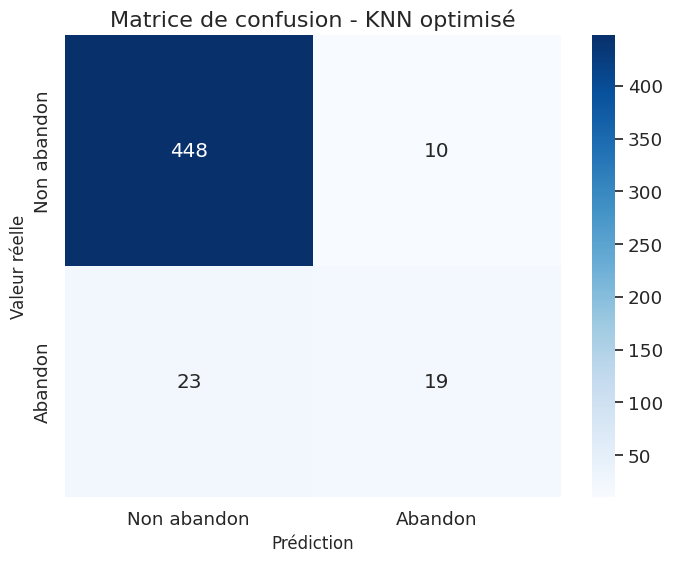


Rapport de classification:
              precision    recall  f1-score   support

 Non abandon       0.95      0.98      0.96       458
     Abandon       0.66      0.45      0.54        42

    accuracy                           0.93       500
   macro avg       0.80      0.72      0.75       500
weighted avg       0.93      0.93      0.93       500


Évaluation du modèle optimisé: Decision Tree
Accuracy: 0.9360
Precision: 0.6000
Recall: 0.7143
F1-score: 0.6522


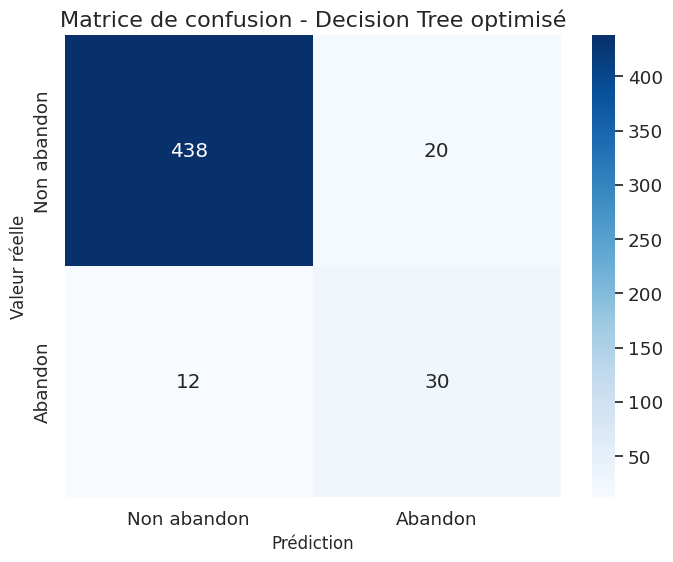


Rapport de classification:
              precision    recall  f1-score   support

 Non abandon       0.97      0.96      0.96       458
     Abandon       0.60      0.71      0.65        42

    accuracy                           0.94       500
   macro avg       0.79      0.84      0.81       500
weighted avg       0.94      0.94      0.94       500


Évaluation du modèle optimisé: Logistic Regression
Accuracy: 0.9500
Precision: 0.7742
Recall: 0.5714
F1-score: 0.6575


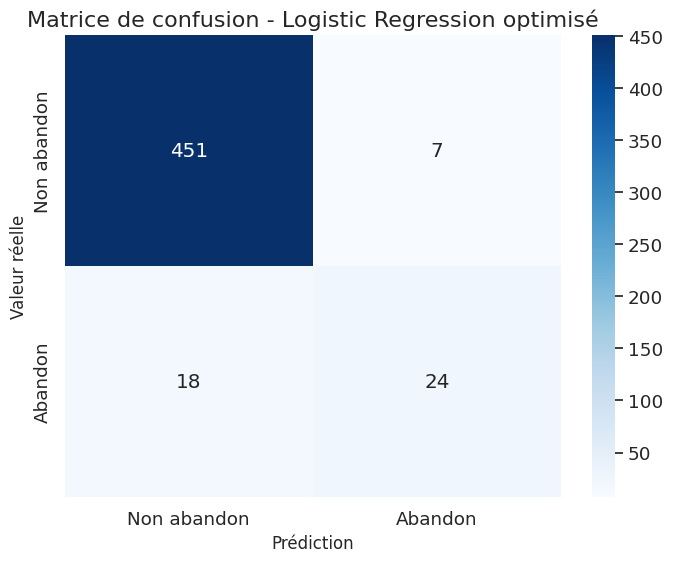


Rapport de classification:
              precision    recall  f1-score   support

 Non abandon       0.96      0.98      0.97       458
     Abandon       0.77      0.57      0.66        42

    accuracy                           0.95       500
   macro avg       0.87      0.78      0.82       500
weighted avg       0.95      0.95      0.95       500



In [ ]:
# Évaluation des modèles optimisés
optimized_results_abandon = {}

for model_name, model_info in best_models_abandon.items():
    print(f"\n{'='*50}")
    print(f"Évaluation du modèle optimisé: {model_name}")
    print(f"{'='*50}")

    best_model = model_info['model']

    # Prédictions
    y_pred = best_model.predict(X_test_abandon)

    # Calcul des métriques de performance
    accuracy = accuracy_score(y_test_abandon, y_pred)
    precision = precision_score(y_test_abandon, y_pred)
    recall = recall_score(y_test_abandon, y_pred)
    f1 = f1_score(y_test_abandon, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test_abandon, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {model_name} optimisé', fontsize=16)
    plt.xlabel('Prédiction', fontsize=12)
    plt.ylabel('Valeur réelle', fontsize=12)
    plt.xticks([0.5, 1.5], ['Non abandon', 'Abandon'])
    plt.yticks([0.5, 1.5], ['Non abandon', 'Abandon'])
    plt.show()

    # Rapport de classification
    print("\nRapport de classification:")
    print(classification_report(y_test_abandon, y_pred, target_names=['Non abandon', 'Abandon']))

    optimized_results_abandon[model_name] = {
        'model': best_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

#KNN (K plus proches voisins)
Accuracy : 93.4 %

Recall pour les abandons : 45 %

F1-score : 0.53

Matrice de confusion :

19 abandons bien détectés

23 abandons non détectés (plus de faux négatifs)

 Interprétation :

Ce modèle est moins performant pour détecter les abandons. Il fonctionne bien pour les non-abandons mais manque beaucoup de cas d’abandon.





#Decision Tree (arbre de décision)
Accuracy : 93.6 %

Recall pour les abandons : 71 %

F1-score : 0.65

Matrice de confusion :

30 abandons bien détectés

Seulement 12 abandons manqués

 Interprétation :

L’arbre est le meilleur pour détecter les abandons (rappel élevé), mais il commet un peu plus d’erreurs sur les non-abandons. Très adapté si l’objectif est de ne rater aucun élève en difficulté, quitte à avoir quelques fausses alertes.






#Logistic Regression (régression logistique)
Accuracy (précision globale) : 95 %

Recall (rappel) pour les abandons : 57 %

F1-score pour les abandons : 0.66

Matrice de confusion :

24 cas d’abandon bien prédits

18 cas d’abandon mal classés (faux négatifs)


Interprétation :

C’est le modèle le plus précis globalement. Il offre un bon compromis entre détecter les abandons (rappel) et éviter de fausses alertes (précision). Très utile si on veut limiter les fausses alertes tout en détectant une partie des abandons.









Comparaison des performances des modèles optimisés:


,accuracy,precision,recall,f1
KNN,0.934,0.655172,0.452381,0.535211
Decision Tree,0.936,0.600000,0.714286,0.652174
Logistic Regression,0.950,0.774194,0.571429,0.657534


<Figure size 1200x800 with 0 Axes>

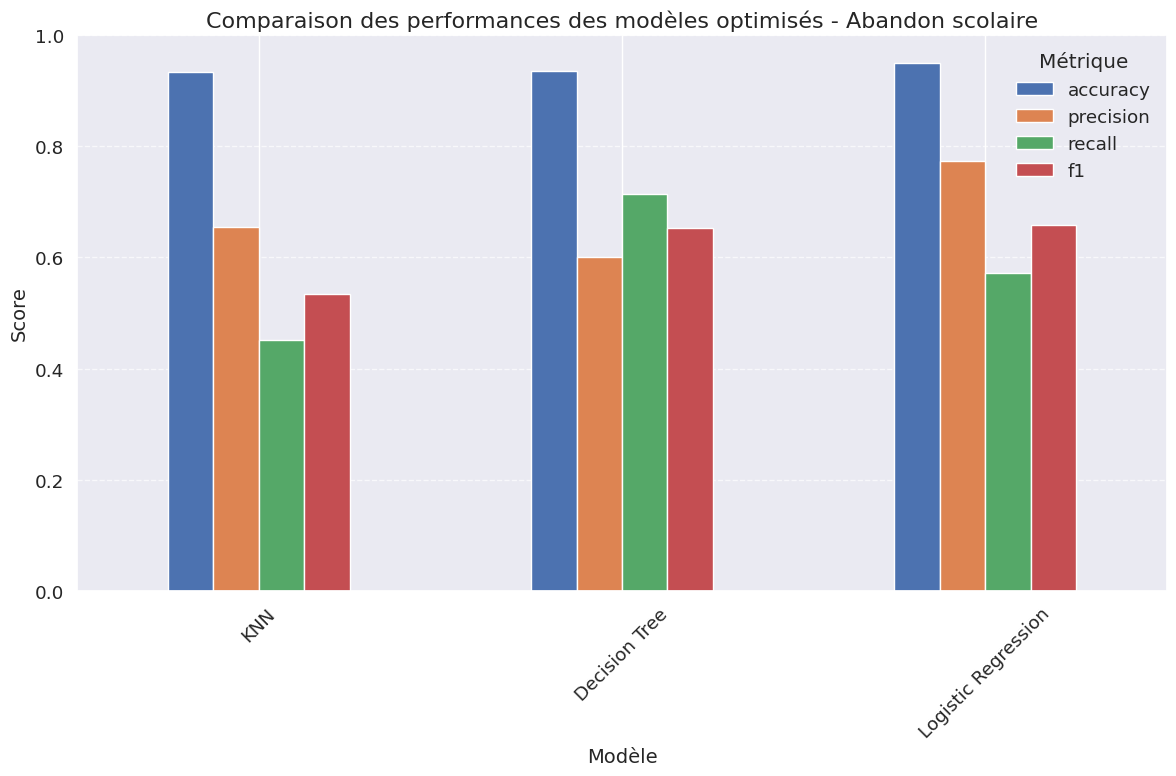

In [ ]:
# Comparaison des modèles optimisés
opt_metrics = ['accuracy', 'precision', 'recall', 'f1']
opt_comparison_data = {metric: [optimized_results_abandon[model][metric] for model in models.keys()]
                      for metric in opt_metrics}

opt_comparison_df = pd.DataFrame(opt_comparison_data, index=models.keys())
print("Comparaison des performances des modèles optimisés:")
display(opt_comparison_df)

# Visualisation des performances
plt.figure(figsize=(12, 8))
opt_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparaison des performances des modèles optimisés - Abandon scolaire', fontsize=16)
plt.xlabel('Modèle', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Métrique')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Logistic Regression
Meilleure précision globale (accuracy) : 95 %

F1-score le plus élevé : 0.66

Bonne précision (0.77), mais rappel plus faible (0.57)

 Ce que tu peux dire :

La régression logistique est le meilleur compromis global. Elle identifie correctement la majorité des cas, tout en limitant les fausses alertes (faux positifs). C’est le plus équilibré des trois.

 2. Decision Tree
Meilleur rappel (0.71) → détecte mieux les abandons

F1-score aussi élevé que la régression logistique

Précision plus faible (0.60)

 Ce que tu peux dire :

L’arbre de décision est le plus efficace pour ne pas rater les élèves en risque d’abandon, ce qui est essentiel dans un contexte éducatif. Il fait plus de fausses alertes, mais permet de mieux couvrir les cas critiques.

 3. KNN
Résultats inférieurs sur presque toutes les métriques

F1-score le plus bas : 0.53

Rappel particulièrement faible (0.45)

 Ce que tu peux dire :

Le modèle KNN est moins performant ici. Il rate beaucoup d’élèves en situation d’abandon, donc pas adapté si l’objectif est de les détecter efficacement.

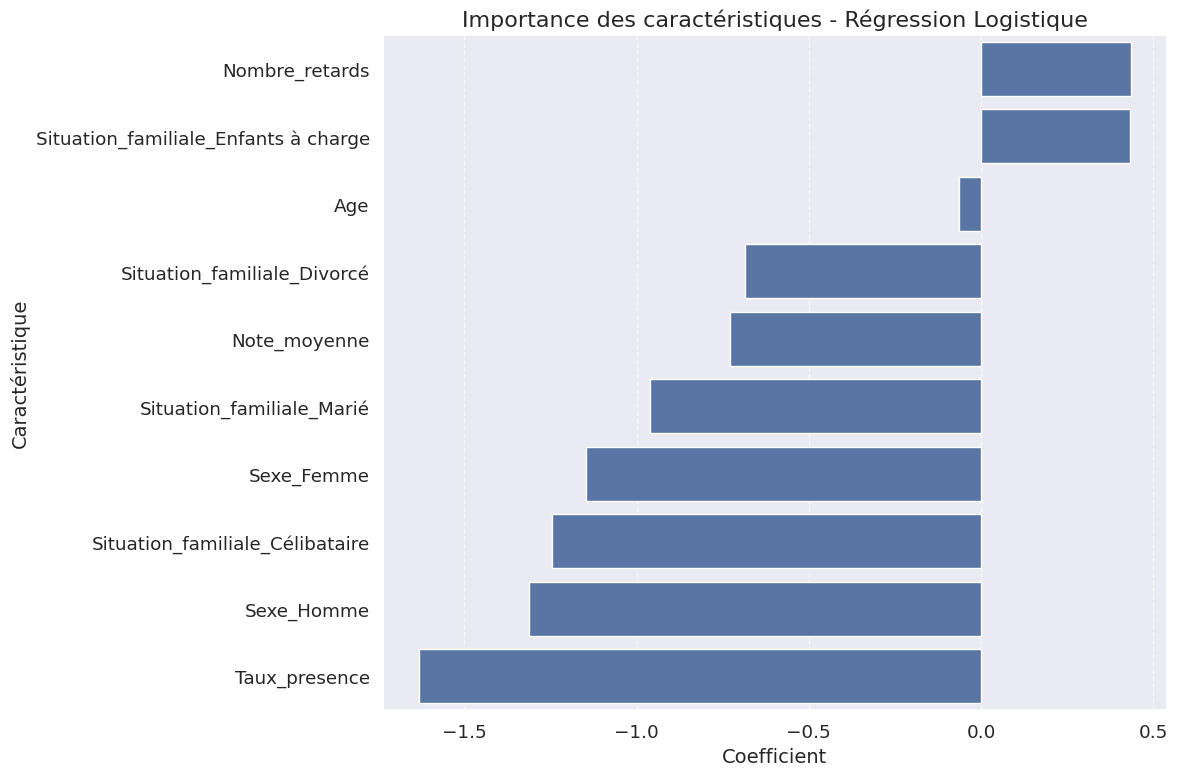

In [ ]:
# Analyse des coefficients pour la régression logistique
if 'Logistic Regression' in optimized_results_abandon:
    # Extraction du modèle optimisé
    log_reg_model = optimized_results_abandon['Logistic Regression']['model']

    # Obtention des coefficients
    try:
        # Extraction des noms de caractéristiques après le prétraitement
        preprocessed_features = []
        # Variables numériques (gardent leur nom)
        preprocessed_features.extend(numeric_features)
        # Variables catégorielles (obtention des noms après one-hot encoding)
        # Récupération du transformateur catégoriel
        cat_transformer = preprocessor.transformers_[1][1]
        # Récupération de l'encodeur
        encoder = cat_transformer.named_steps['onehot']
        # Obtention des catégories
        cat_features_encoded = encoder.get_feature_names_out(categorical_features)
        preprocessed_features.extend(cat_features_encoded)

        # Extraction des coefficients
        coeffs = log_reg_model.named_steps['classifier'].coef_[0]

        # Création d'un DataFrame pour visualiser les coefficients
        coef_df = pd.DataFrame({'Feature': preprocessed_features, 'Coefficient': coeffs})
        coef_df = coef_df.sort_values('Coefficient', ascending=False)

        # Visualisation des coefficients
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Coefficient', y='Feature', data=coef_df)
        plt.title('Importance des caractéristiques - Régression Logistique', fontsize=16)
        plt.xlabel('Coefficient', fontsize=14)
        plt.ylabel('Caractéristique', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de l'extraction des coefficients: {e}")
        print("Analyse des coefficients impossible.")

Facteurs qui réduisent l’abandon scolaire (coefficients négatifs)
Taux de présence (fortement négatif)
→ Plus un élève est présent, moins il risque d’abandonner.

Sexe_Homme, Célibataire, Femme, Marié
→ Ces variables semblent être liées à un risque plus faible, selon les coefficients.

Note moyenne
→ De meilleures notes réduisent aussi le risque.

 À dire au prof :

Le taux de présence est le facteur le plus important dans la prévention de l’abandon. C’est logique : l’assiduité est un indicateur fort d’engagement scolaire.

Facteurs qui augmentent le risque d’abandon (coefficients positifs)
Nombre de retards
→ Plus l’élève a de retards, plus il est à risque.

Situation familiale : Enfants à charge
→ Avoir des enfants à charge semble augmenter la pression et le risque d’abandon.

Âge
→ Un âge plus élevé est légèrement lié à un risque accru (élèves en reprise d'études ?).

 À dire au prof :

Ces facteurs sont logiques. Les retards, les responsabilités familiales et l’âge peuvent compromettre la capacité à suivre les cours régulièrement.

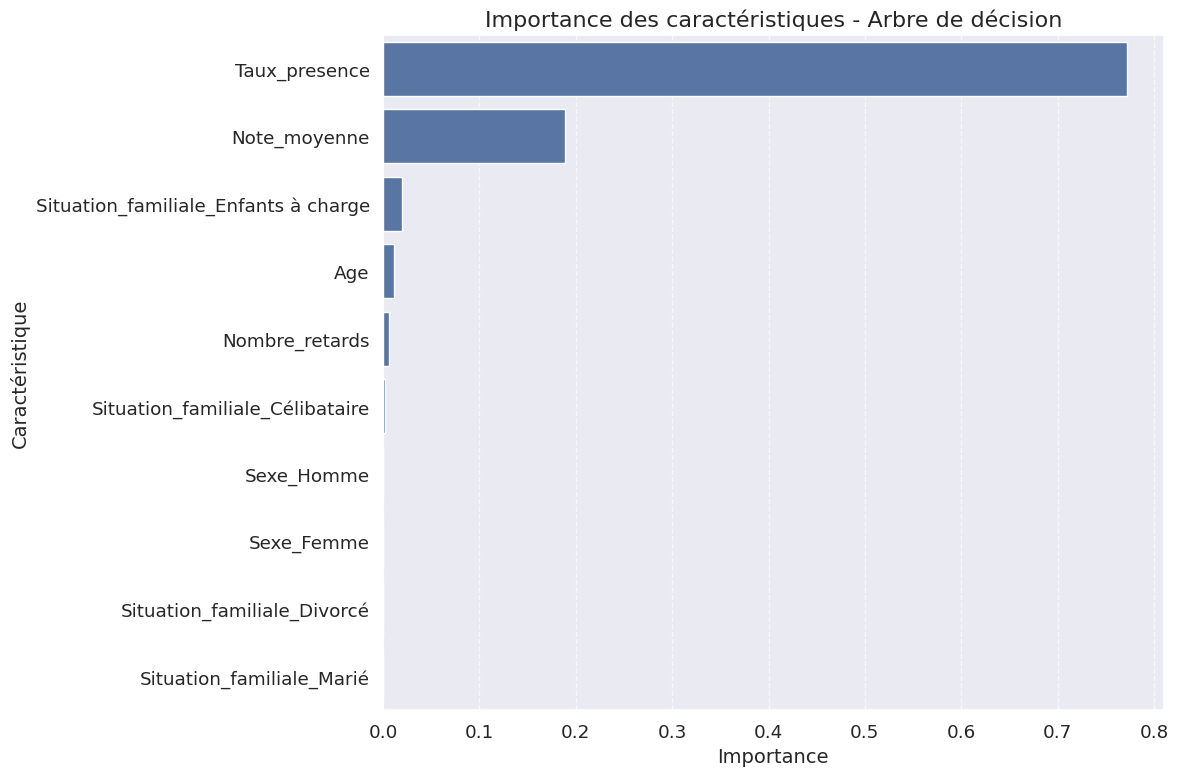

In [ ]:
# Analyse de l'importance des caractéristiques pour l'arbre de décision
if 'Decision Tree' in optimized_results_abandon:
    # Extraction du modèle optimisé
    tree_model = optimized_results_abandon['Decision Tree']['model']

    # Obtention des importances
    try:
        # Extraction des noms de caractéristiques après le prétraitement
        preprocessed_features = []
        # Variables numériques (gardent leur nom)
        preprocessed_features.extend(numeric_features)
        # Variables catégorielles (obtention des noms après one-hot encoding)
        # Récupération du transformateur catégoriel
        cat_transformer = preprocessor.transformers_[1][1]
        # Récupération de l'encodeur
        encoder = cat_transformer.named_steps['onehot']
        # Obtention des catégories
        cat_features_encoded = encoder.get_feature_names_out(categorical_features)
        preprocessed_features.extend(cat_features_encoded)

        # Extraction des importances
        importances = tree_model.named_steps['classifier'].feature_importances_

        # Création d'un DataFrame pour visualiser les importances
        imp_df = pd.DataFrame({'Feature': preprocessed_features, 'Importance': importances})
        imp_df = imp_df.sort_values('Importance', ascending=False)

        # Visualisation des importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=imp_df)
        plt.title('Importance des caractéristiques - Arbre de décision', fontsize=16)
        plt.xlabel('Importance', fontsize=14)
        plt.ylabel('Caractéristique', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de l'extraction des importances: {e}")
        print("Analyse des importances impossible.")

**Le graphique montre l'importance des différentes caractéristiques utilisées par l'arbre de décision pour prédire l'abandon. On observe que le taux de présence est de loin la variable la plus influente, suivi par la note moyenne. Les autres variables, telles que l’âge, le nombre de retards, le sexe ou la situation familiale, ont une importance négligeable dans la décision du modèle**.**texte en gras**

 Interprétation du graphique:

Axe des y (Caractéristique) : ce sont les variables utilisées pour entraîner le modèle. Elles incluent :

Taux_presence : taux de présence en cours.

Note_moyenne : moyenne des notes.

Situation_familiale_Enfants à charge, Célibataire, etc. : statut familial encodé avec one-hot encoding.

Sexe_Homme, Sexe_Femme : sexe, également encodé.

Nombre_retards, Age : variables numériques.

Axe des x (Importance) : c’est l’importance de chaque variable dans le modèle

Résultat principal :

Taux_presence est de loin la caractéristique la plus importante (près de 0.8).

Note_moyenne a aussi une certaine importance (environ 0.18).

Les autres variables (comme Situation_familiale_Enfants à charge, Age, Nombre_retards, etc.) ont une influence négligeable.

Cela signifie que le modèle s’appuie principalement sur le taux de présence et la moyenne des notes pour prendre ses décisions. Le reste des variables contribue très peu.

